In [0]:
!pip install pillow

0.9772924050760383 1.3090463267948966 0.21351373862143277


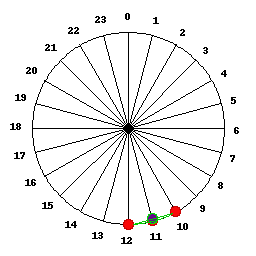

In [0]:
from PIL import Image, ImageDraw, ImageFont
import math 
sz = 128


def getxy(hour):
    x = math.sin((180 - hour * 15)/180 * 3.141)
    y = math.cos((180 - hour * 15)/180 * 3.141)
    return x, y


def from_center(ratio):
    return lambda z: sz + sz * ratio * z

place34 = from_center(3/4)
place78 = from_center(7/8)

rad_to_deg = lambda x: 180 * x / 3.14159
 


    
    
def  draw_circle(*points):
    def draw_time_point(x1, y1, **kwargs):
    
        draw.ellipse((place34(x1) - 5, 
                      place34(y1) - 5,
                      place34(x1) + 5,
                      place34(y1) + 5),
                     **kwargs)
        
        
    im = Image.new('RGB',(2 * sz, 2*sz))
    draw = ImageDraw.Draw(im)
    draw.rectangle((0,0) + im.size, fill=(256, 256, 256))
    draw.ellipse((sz / 4,
                  sz / 4,
                  sz * 7 / 4,
                  sz * 7 / 4), outline = 0) 
    
    for i in range(24):
        x,y = getxy(i)
        draw.line((sz,
                   sz, 
                   place34(x), 
                   place34(y)),            
                  fill = 0) 
        
        draw.text((place78(x) - 5 - 2*y,  # slight rotation to align numbers 
                   place78(y) - 5 + 2*x ), 
                  str(i), 
                  fill = 0)
        
 
    if len(points):
        xx, yy = list(zip(*[ getxy(p) for p in points]))
        for x1, y1 in zip(xx, yy):
            draw_time_point(x1, y1, outline = (200,5,5), fill=(250,9,9))
            
        xm = sum(xx)/len(xx)
        ym = sum(yy)/len(yy)
        draw_time_point(xm, ym, outline = (0,215,5), fill=(100,9,139))
        
        r = math.sqrt(xm**2 + ym**2)
        avg = math.atan2(ym, xm)
        arc = math.acos(r)
        print(r,avg,arc)
        
        draw.chord(xy=(sz/4,
                       sz/4,
                       sz * 7/4,
                       sz * 7/4),
                   start=rad_to_deg(avg - arc),
                   end=rad_to_deg(avg + arc),
                   outline=(0,200,0))
        
    return im
draw_circle(10,11,12)

0.9914480842722068 1.1781713267948966 0.1308749999999996


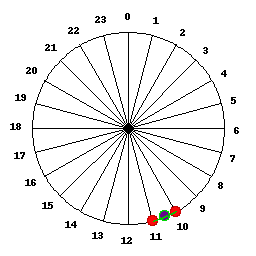

In [0]:
draw_circle(10,11)

0.95767798204352 -2.2257639803846896 0.2919724615234667


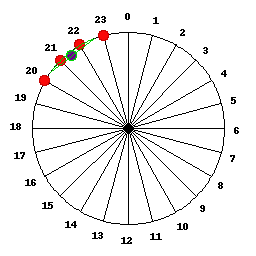

In [0]:
draw_circle(20,21,22,23)

0.9575257636392311 -1.7016713267948966 0.29250082381486614


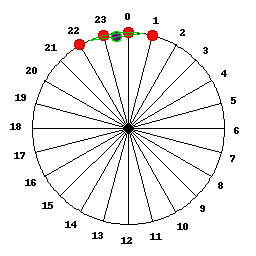

In [0]:
draw_circle(0,1,22,23)

0.5190087934673331 -0.7907006721708472 1.0251054042201542


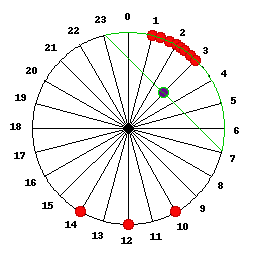

In [0]:
draw_circle(1,1.3, 1.7,2.0,2.2 ,2.4,2.7,3,10,12,14)

In [0]:
""" A BIT OF HACKED TOGETHER Spark 


from pyspark.sql import functions as F

data = <some dataframe with users and timestamp ts> 

data.withColumn("rads", (F.hour(F.col('ts'))*15 + 
                         F.minute(F.col('ts'))/4) * 3.14159/ 180  ) \
    .withColumn('sinT', F.sin(F.col('rads')))\
    .withColumn('cosT', F.cos(F.col('rads')))\
    .createOrReplaceTempView("data")
    
q = spark.sql("select user, avg(sinT) AS s, avg(cosT) AS c FROM data group by user")
qn = q.withColumn("mean_hour", (F.atan2(F.col('s'),
                                        F.col('c'))
                                /3.14159 * 12 + 24)%24) \
      .withColumn("std_hours", F.acos(F.sqrt(F.pow( F.col('s'), 2) +  
                                             F.pow( F.col('c'), 2)))
                               /3.14159*12) \
      .drop('s') \
      .drop('c')
"""